In [51]:
import json
import numpy as np
from sklearn.linear_model import LogisticRegression
import csv
import pandas as pd
from scipy.optimize import minimize

In [52]:
# Import from csv
with open(f'../export.csv','r') as f:
    csvFile = csv.reader(f)


In [53]:
def transform_x52(value):
    return -value



In [54]:
df = pd.read_csv(f'../export.csv')
# Áp dụng hàm biến đổi cho cột x52
df['x52'] = df['x52'].apply(transform_x52)
X = df[['x11', 'x12', 'x21', 'x22', 'x23', 'x24', 'x31', 'x32', 'x41', 'x42', 'x43', 'x51', 'x52', 'x61', 'x71', 'x72']].values
y = df['label'].values

Y = np.array([[y[i]/1.0] for i in range(len(y)) ])

In [55]:
# clf = LogisticRegression(multi_class='multinomial', random_state=0)
# clf.fit(X, y)
# theta = clf.coef_
# # theta = theta.reshape(-1, 1)

In [56]:
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''   
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return h

In [57]:
def gradientDescent(x, y, theta, alpha, num_iters, lambda_reg):
    m = x.shape[0]
    n = x.shape[1]

    for i in range(0, num_iters):
        z = np.dot(x, theta)
        h = sigmoid(z)
        # Calculate the regularized cost function
        J = -1.0 / m * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + (lambda_reg / (2 * m)) * np.sum(theta[1:]**2)
        # Update the weights theta with regularization
        gradient = (1 / m) * np.dot(x.T, (h - y))
        regularization_term = (lambda_reg / m) * theta
        regularization_term[0] = 0  # Exclude regularization for the bias term
        theta = theta - alpha * (gradient + regularization_term)
    J = float(J)
    return J, theta

In [58]:
X

array([[300, 300, 690, ..., 300, 300, 690],
       [300, 300, 690, ..., 300, 300, 690],
       [300, 715, 736, ..., 300, 612, 690],
       ...,
       [850, 811, 679, ..., 300, 624, 690],
       [300, 300, 300, ..., 300, 300, 690],
       [850, 807, 300, ..., 300, 624, 690]], dtype=int64)

In [59]:
Y

array([[1.],
       [1.],
       [1.],
       ...,
       [5.],
       [5.],
       [5.]])

In [60]:
J, theta = gradientDescent(X, Y, np.zeros((16, 1)), 1e-7, 1000, 0.01)

C:\Users\Dao Trong Hoan\AppData\Local\Temp\ipykernel_18484\4152779544.py:9: RuntimeWarning: divide by zero encountered in log
  J = -1.0 / m * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + (lambda_reg / (2 * m)) * np.sum(theta[1:]**2)


In [61]:
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is nan.
The resulting vector of weights is [0.23818733, 0.24347295, 0.17191476, 0.17036356, 0.16362909, 0.15387719, 0.18242584, 0.16606575, 0.25462365, 0.3011736, 0.30096552, 0.08594102, -0.01956624, 0.11404427, 0.17084916, 0.24458981]


In [62]:
theta

array([[ 0.23818733],
       [ 0.24347295],
       [ 0.17191476],
       [ 0.17036356],
       [ 0.16362909],
       [ 0.15387719],
       [ 0.18242584],
       [ 0.16606575],
       [ 0.25462365],
       [ 0.3011736 ],
       [ 0.30096552],
       [ 0.08594102],
       [-0.01956624],
       [ 0.11404427],
       [ 0.17084916],
       [ 0.24458981]])

In [63]:
def calculate_features(sub_features):
    sum = sub_features.sum()
    b = (1/sum)*sub_features
    a = sub_features[0]/b[0]
    return(a , b )

In [64]:
ab1 = theta[0:2]
ab2 = theta[2:6]
ab3 = theta[6:8]
ab4 = theta[8:11]
ab5 = theta[11:13]
ab6 = theta[13:14]
ab7 = theta[14:16]
ab_all = [ab1, ab2, ab3, ab4, ab5, ab6, ab7]
final_a = []
final_b = []
for ab in ab_all:
    a, b = calculate_features(ab)
    final_a.append(a)
    final_b.append(b)
    # print(calculate_features(ab))
final_b[4][-1]= -final_b[4][-1] 
final_a = final_a/np.array(final_a).sum()

In [76]:
print(ab_all)

[array([[0.23818733],
       [0.24347295]]), array([[0.17191476],
       [0.17036356],
       [0.16362909],
       [0.15387719]]), array([[0.18242584],
       [0.16606575]]), array([[0.25462365],
       [0.3011736 ],
       [0.30096552]]), array([[ 0.08594102],
       [-0.01956624]]), array([[0.11404427]]), array([[0.17084916],
       [0.24458981]])]


In [65]:
def fn_combined_features(features):
    combined = []
    for items in features:
        tmp = []
        for index, item in enumerate(items):
            for _ in item:
                tmp.append(_)
        combined.append(tmp)
    return np.array(combined)

In [66]:
def about(value, _min=300, _max=850):
    if value < _min:
        value = _min
    elif value > _max:
        value = _max
    return int(value) 

In [67]:
final_b

[array([[0.49451312],
        [0.50548688]]),
 array([[0.26056194],
        [0.25821087],
        [0.24800381],
        [0.23322338]]),
 array([[0.52347272],
        [0.47652728]]),
 array([[0.29719271],
        [0.35152508],
        [0.35128221]]),
 array([[1.29478434],
        [0.29478434]]),
 array([[1.]]),
 array([[0.41124971],
        [0.58875029]])]

In [68]:
final_b = fn_combined_features(final_b)

C:\Users\Dao Trong Hoan\AppData\Local\Temp\ipykernel_18484\2614134860.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(combined)


In [69]:
from collections import defaultdict
count = defaultdict(int)

In [70]:
from collections import defaultdict


def check_acc(label, score):
    if label == 1:
        if score >= 300 and score <= 580:
            return True
        else:
            return False
    if label == 2:
        if score > 580 and score <= 670:
            return True
        else:
            return False
    if label == 3:
        if score > 670 and score <= 740:
            return True
        else:
            return False
    if label == 4:
        if score > 740 and score <= 800:
            return True
        else:
            return False
    if label == 5:
        if score > 800 and score <= 850:
            return True
        else:
            return False


In [71]:
def evaluate(matrices, y):
    list_score = []
    for i in range(len(matrices)):
        matric = matrices[i]
        # print(final_a[0] * np.dot(final_b[0], matric[0:2]), final_a[1] * np.dot(final_b[1], matric[2:6]), final_a[2] * np.dot(final_b[2], matric[6:8]), final_a[3] * np.dot(final_b[3], matric[8:11]), final_a[4] * about(np.dot(final_b[4], matric[11:13])), final_a[5] * np.dot(final_b[5], matric[13:14]), final_a[6] * np.dot(final_b[6], matric[14:16]))
        score = (
            final_a[0] * np.dot(final_b[0], matric[0:2])
            + final_a[1] * np.dot(final_b[1], matric[2:6])
            + final_a[2] * np.dot(final_b[2], matric[6:8])
            + final_a[3] * np.dot(final_b[3], matric[8:11])
            + final_a[4] * about(np.dot(final_b[4], matric[11:13]))
            + final_a[5] * np.dot(final_b[5], matric[13:14])
            + final_a[6] * np.dot(final_b[6], matric[14:16])
        )
        if check_acc(y[i], score):
            count[y[i]] += 1

In [72]:
evaluate(X,y)
theta

array([[ 0.23818733],
       [ 0.24347295],
       [ 0.17191476],
       [ 0.17036356],
       [ 0.16362909],
       [ 0.15387719],
       [ 0.18242584],
       [ 0.16606575],
       [ 0.25462365],
       [ 0.3011736 ],
       [ 0.30096552],
       [ 0.08594102],
       [-0.01956624],
       [ 0.11404427],
       [ 0.17084916],
       [ 0.24458981]])

In [73]:
count

defaultdict(int, {1: 219, 2: 50, 4: 4})

In [74]:
count_label = {}
# Đếm số lần xuất hiện của mỗi label trong y
for label in y:
    if label in count_label:
        count_label[label] += 1
    else:
        count_label[label] = 1

# In từ điển count_label

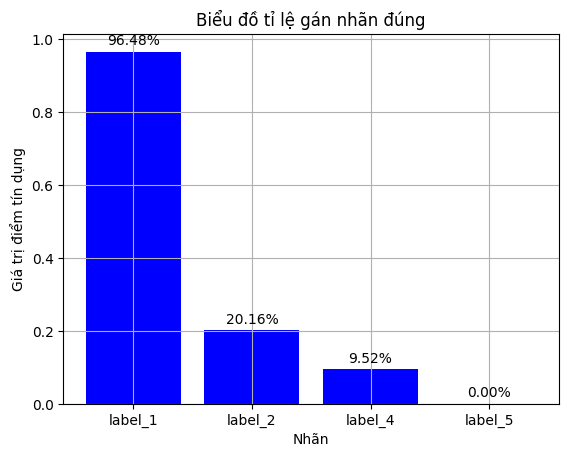

In [75]:
import matplotlib.pyplot as plt

label_name = ['label_1', 'label_2', 'label_4', 'label_5']
accuracy_list = [count[tmp]/count_label[tmp] for tmp in count_label]

# Tạo danh sách chỉ số từ 1 đến độ dài của mảng
indices = list(range(1, len(accuracy_list) + 1))

# Vẽ biểu đồ cột
plt.bar(indices, accuracy_list, color='blue')

plt.title('Biểu đồ tỉ lệ gán nhãn đúng')
plt.xlabel('Nhãn')
plt.ylabel('Giá trị điểm tín dụng')

# Hiển thị giá trị trực tiếp trên đỉnh của mỗi cột với tên nhãn
for i, v in enumerate(accuracy_list):
    plt.text(i + 1, v + 0.01, f'\n{v*100:.2f}%', ha='center', va='bottom', color='black')

# Đặt nhãn trục x
plt.xticks(indices, label_name)

plt.grid(True)
plt.show()
